# <center> Calculus-based Optimization Examples
## <center> Systems Engineering and Analysis
## <center> <img src="https://www.engr.colostate.edu/~jdaily/Systems-EN-CSU-1-C357.svg" width="400" /> 
### <center> Prepared by: Dr. Jeremy Daily

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In the following block, define a function to evaluate. There are 2 candidates to choose from, one is a simple parabola and the other is a 6th order Legendre polynomial. Comment and uncomment the return values to see the differences in the results.

In [2]:
# Define the objective or cost function to minimize
# If you are trying to maximize, then multiply by -1
def f(x):
    #return (x-2)**2 + 2
    return -(3*x-3)*(x-2)*(x-1)*(x+1)*(x+2)*(x+3)


In [3]:
# This is optional. Some algorithms can utilize the first derivative 
def f_prime(x):
    # f(x) = (x-2)**2 + 2
    return 2*(x-2)

In [4]:
# This is optional. Some optimization algorithms can utilize the second derivative
def f_pprime(x):
    # f(x) = (x-2)**2 + 2
    return 2

In [5]:
#Invoke the function call from the optimize library
initial_guess = 0
result = optimize.minimize(f,initial_guess)
result

      fun: 2.4301602111911985e-15
 hess_inv: array([[0.00693675]])
      jac: array([1.90947559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1.00000001])

In [6]:
# The result is an object with different members. We can evaluate the 
# results to ensure convergence and extract the answer.
if result.success == True:
    min_x = result.x
else:
    min_x = None

print(min_x)

[1.00000001]


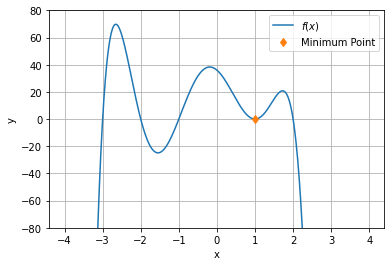

In [7]:
#plot the function and visualize the result
x = np.arange(-4,4,.01)
plt.plot(x,f(x),label="$f(x)$")
#plt.plot(x,f_prime(x),label="$f^\prime(x)$")
if result.success == True:
    plt.plot(min_x,f(min_x),'d',label="Minimum Point")
plt.grid()
plt.ylim([-80,80])
plt.xlabel("x")
plt.ylabel('y')
plt.legend();

If the Hessian is positive-definite at $x$ then $f(x)$ is at a local minimum.

The Hessian Matrix $[H]$ is a matrix of second derivatives.

https://en.wikipedia.org/wiki/Hessian_matrix

The definition of positive means for all $x$, the following matrix equation must hold.

$$x^T[H]x > 0$$

https://en.wikipedia.org/wiki/Definite_matrix

If all the eigenvalues of the Hessian matrix are greater than zero, then the matrix is positive definite. Therefore, if all the eigenvalues of the Hessian are positive, then the stationary point is at a local minimum.

In [8]:
# The optimization library gave us an estimate for the inverse of the Hessian.
# Therefore, we need to invert it and calculate the eigenvalues
hessian = np.linalg.inv(result.hess_inv)
eigenvalues,eigenvectors = np.linalg.eig(hessian)
print(eigenvalues)
if np.all(eigenvalues > 0):
    print("The stationary point is at a local minimum.")
else:
    print("The stationary point is not at a minimum.")

[144.15967109]
The stationary point is at a local minimum.


## Multistart
Is this a true minimum? The mathematics will usually achieve results for a local minimum. Let's try an approach that searches the design space by changing the initial guess.

In [9]:
# Start with defining the bounds of the search space:
x_low = -5
x_high = 5

#Specify the number of samples to seed
N = 10

#Create an array with N samples
x_array = np.linspace(x_low,x_high,N)

# determine the space in between each of the samples
delta_x = x_array[1] - x_array[0]

#Randomize the space between 
x_rand = np.random.random(N)*delta_x

# Make an array that has ran
x_rand_array = x_array + x_rand

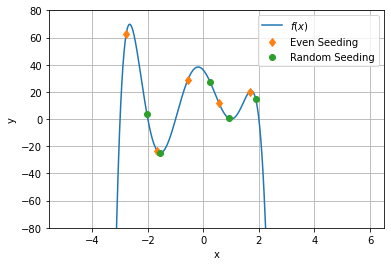

In [10]:
# Let's visualize this "random" seeding across the space
#plot the function and visualize the result
x = np.arange(-4,4,.01)
plt.plot(x,f(x),label="$f(x)$")
plt.plot(x_array,f(x_array),'d',label="Even Seeding")
plt.plot(x_rand_array,f(x_rand_array),'o',label="Random Seeding")
plt.grid()
plt.ylim([-80,80])
plt.xlabel("x")
plt.ylabel('y')
plt.legend();

The random seeding helps overcome potential issues of periodicity that may show up. 

Let's look to using these random seeds an evaluate the optimization problem.

In [11]:
# Start with the first option
initial_guess = 0
result = optimize.minimize(f,0)
result

      fun: 2.4301602111911985e-15
 hess_inv: array([[0.00693675]])
      jac: array([1.90947559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1.00000001])

In [12]:
# work through the remaining options
for initial_guess in x_rand_array:
    # perform the minimization (this may produce a warning if no local minimum)
    trial = optimize.minimize(f,initial_guess)
    # Check to see if the calculation found a minimum
    if trial.success:
        #check to see if the new trial result is smaller than the last one
        if trial.fun < result.fun:
            #if so, then set the result to the new value
            result=trial
result

<ipython-input-2-fe9920a4e7f4>:5: RuntimeWarning: overflow encountered in multiply
  return -(3*x-3)*(x-2)*(x-1)*(x+1)*(x+2)*(x+3)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-2-fe9920a4e7f4>:5: RuntimeWarning: overflow encountered in multiply
  return -(3*x-3)*(x-2)*(x-1)*(x+1)*(x+2)*(x+3)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-2-fe9920a4e7f4>:5: RuntimeWarning: overflow encountered in multiply
  return -(3*x-3)*(x-2)*(x-1)*(x+1)*(x+2)*(x+3)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-2-fe9920a4e7f4>:5: RuntimeWarning: overflow encountered in multiply
  return -(3*x-3)*(x-2)*(x-1)*(x+1)*(x+2)*(x+3)
C:\ProgramData\Anaconda3\lib\sit

      fun: -24.85372449968433
 hess_inv: array([[0.00443257]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.54695403])

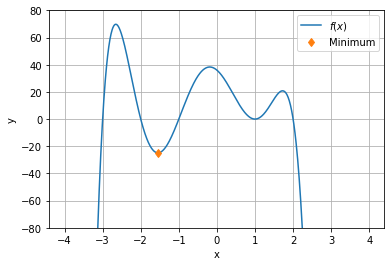

In [13]:
x = np.arange(-4,4,.01)
plt.plot(x,f(x),label="$f(x)$")
plt.plot(result.x,result.fun,'d',label="Minimum")
plt.grid()
plt.ylim([-80,80])
plt.xlabel("x")
plt.ylabel('y')
plt.legend();

## Multiple Variables


In [14]:
# import the helpers for plotting in 3-D
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Define a function to minimize
def z(vector):
    x=vector[0]
    y=vector[1]
    R = np.sqrt(2*x**2 + y**2)
    return np.sin(R)+0.1*(x-1)**2 + 0.05*y**2

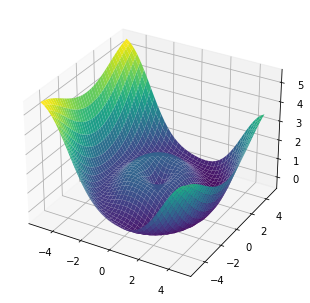

In [16]:
# Plot the function's surface
#%matplotlib notebook
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = z([X,Y])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

In [17]:
initial_guess = np.array([0.1,0.1])
result1 = optimize.minimize(z,initial_guess)
result1

      fun: 0.10000001094354444
 hess_inv: array([[ 6.79099747e-09, -1.05088017e-09],
       [-1.05088017e-09,  1.33298024e-08]])
      jac: array([0.10554654, 0.15016242])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 312
      nit: 26
     njev: 100
   status: 2
  success: False
        x: array([-5.60208099e-09, -5.80751457e-09])

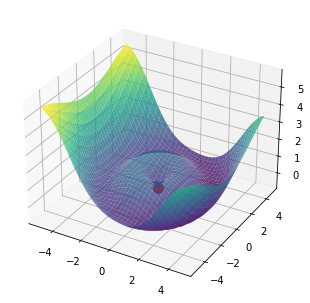

In [18]:
# Plot the function's surface
#%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax.scatter(result1.x[0],result1.x[1],result1.fun, 'o', c='r',  s=100)
plt.show()

This solution is at a local minimum, but the gradient at that point is undefined. Therefore, the solver doesn't like the result due to convergence issues. Let's try some other points.

In [19]:
initial_guess = np.array([-2,0])
result2 = optimize.minimize(z,initial_guess)
result2

      fun: 0.701753791359711
 hess_inv: array([[0.53738985, 0.        ],
       [0.        , 1.        ]])
      jac: array([2.44379044e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-2.91701752,  0.        ])

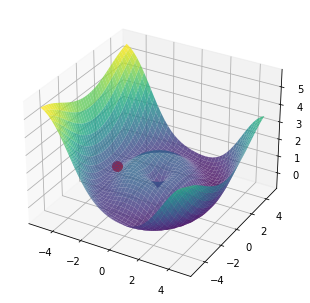

In [20]:
# Plot the function's surface
#%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax.scatter(result2.x[0],result2.x[1],result2.fun, 'd', c='r',  s=100)
plt.show()

This result produced a converged result for a local minimum, but this minimum is greater than the previous. We'll have to try another starting point. 

In [21]:
initial_guess = np.array([2,2])
result3 = optimize.minimize(z,initial_guess)
result3

      fun: -0.5058924499888434
 hess_inv: array([[ 0.47462925,  0.03993231],
       [ 0.03993231, 30.25203817]])
      jac: array([ 1.07288361e-06, -3.50177288e-07])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([ 3.11714968e+00, -1.06512419e-05])

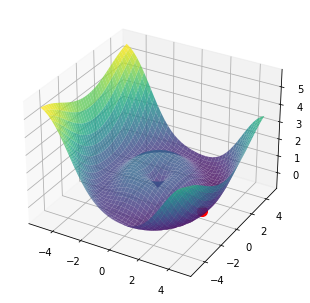

In [22]:
# Plot the function's surface
#%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax.scatter(result3.x[0],result3.x[1],result3.fun, 'd', c='r',  s=100)
plt.show()

In [23]:
# Check to see if this is a minimum by checking the sign of the eigenvalues of the hessian matrix.
# The optimization library gave us an estimate for the inverse of the Hessian.
# Therefore, we need to invert it and calculate the eigenvalues
hessian = np.linalg.inv(result3.hess_inv)
eigenvalues,eigenvectors = np.linalg.eig(hessian)
print(eigenvalues)
if np.all(eigenvalues > 0):
    print("The stationary point is at a local minimum.")
else:
    print("The stationary point is not at a minimum.")
print("The stationary point is at (x,y,z) coordinates of ({:0.3f},{:0.3f},{:0.3f})".format(result3.x[0],result3.x[1],result3.fun))

[2.10714538 0.03305557]
The stationary point is at a local minimum.
The stationary point is at (x,y,z) coordinates of (3.117,-0.000,-0.506)


### Summary
Examples of using the optimize.minimize function in Scientific Python is based on numerical methods for solving calculus based optimizations. The algorithm is able to estimate the first and second derivatives (Jacobian and Hessian) for multi-dimensional problems. However, the result is always a local minimum, which means the function needs to be visualized to help make a good initial guess, or a random seeding is necessary to cover the design space efficiently. Finally, some functions have undefined derivatives at their extrema, which makes convergence criteria hard to meet. 